# Import Libraries

In [1437]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
import matplotlib.image as mpimg 
from sklearn.ensemble import RandomForestRegressor

# Load Data

### Orig Data: 

In [1614]:
depth = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April2/final_sample_depth_unscaled_removed_lower_exp0.csv")
force = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April2/final_sample_force_unscaled_removed_lower_exp0.csv")
depth['Defor'] = depth.Depth.diff()
depth['Defor'][0]=-depth.Depth[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


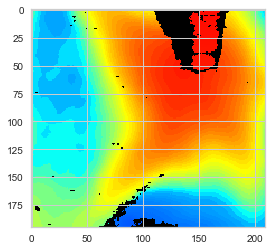

In [1439]:
# Read Images 
img = mpimg.imread('/Users/sunnysingh/Desktop/HarVi/curr_work/Images/April2/Silicone_200poke/frame000000.png') 
  
# Output Images 
plt.imshow(img) 

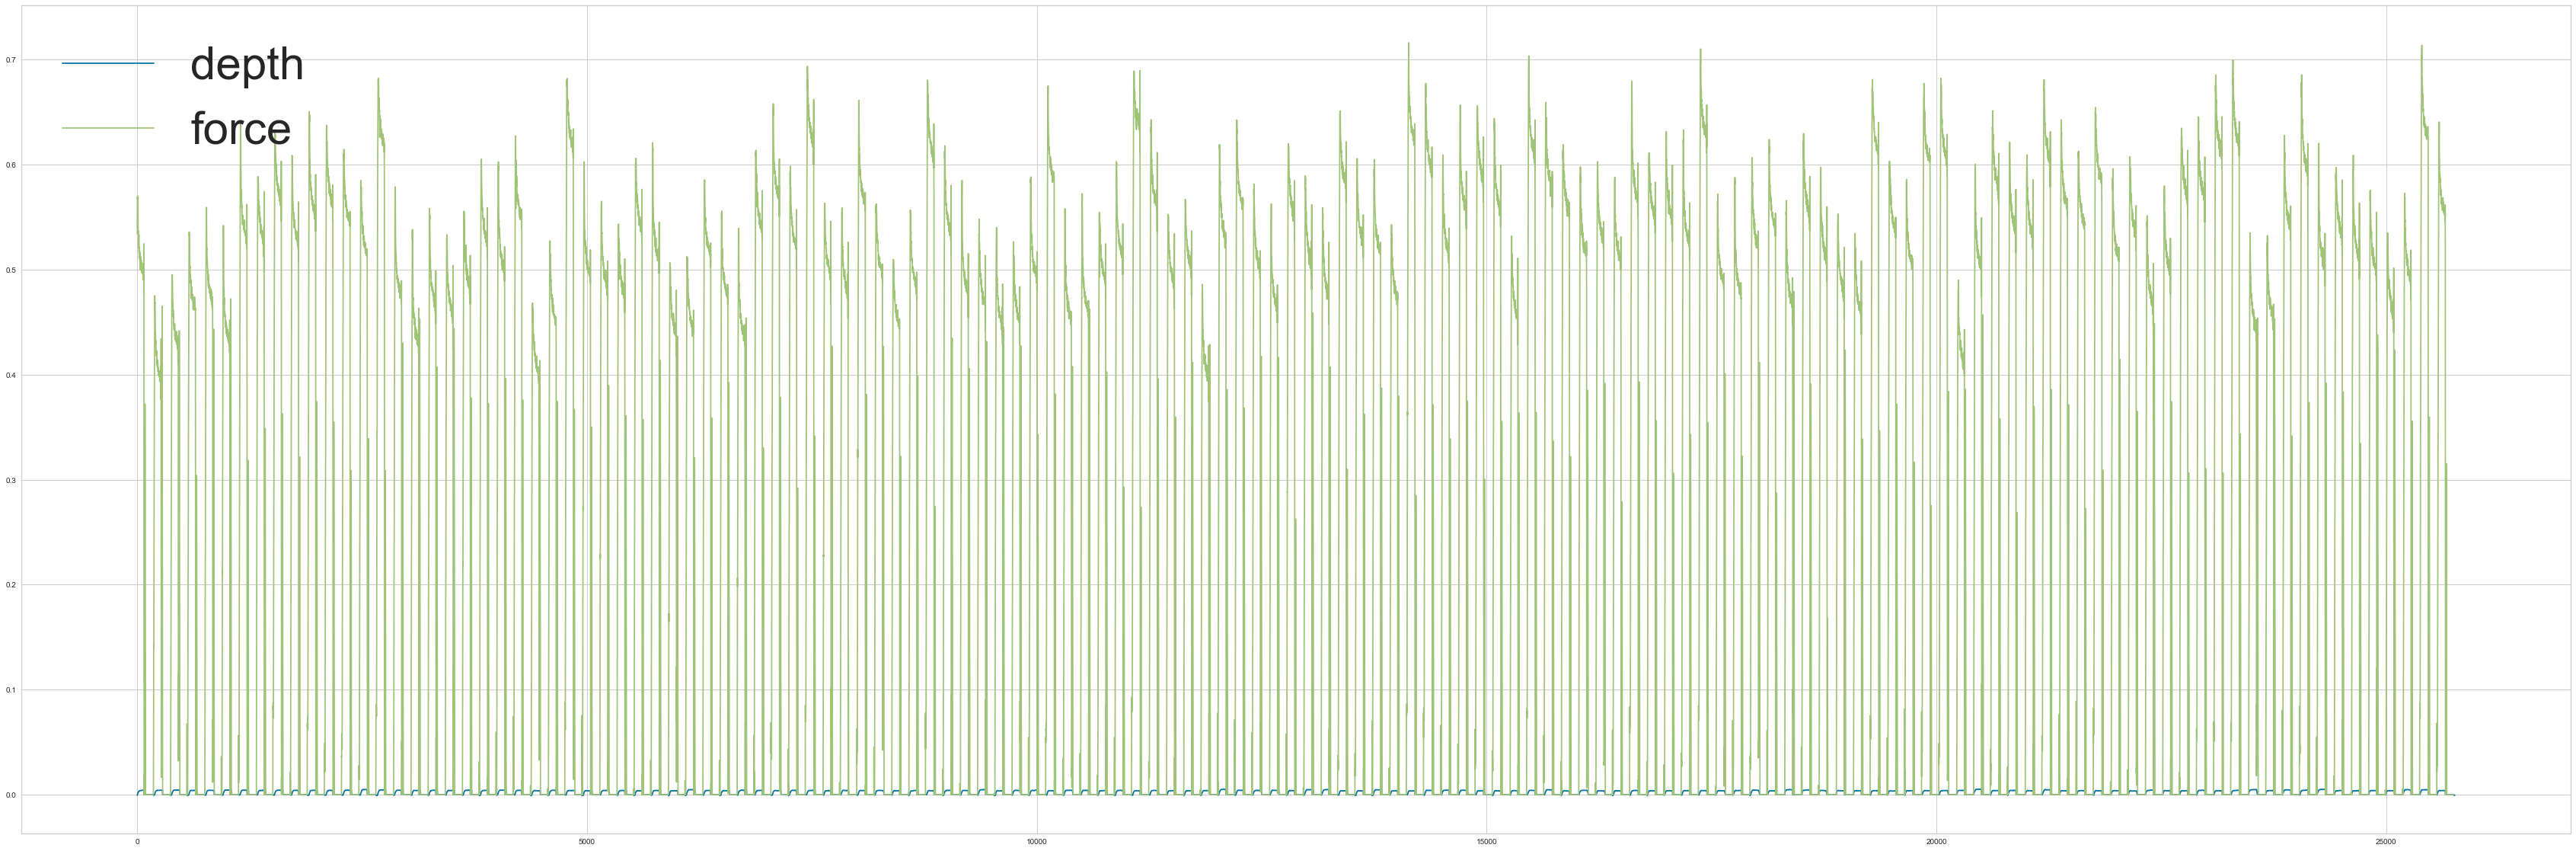

In [1527]:
plt.figure(figsize=(60,20))
plt.plot(depth.Depth)
plt.plot(force)
plt.legend(['depth','force'],loc=2,prop={'size': 60})
plt.show()

### Experiment 1: Twice Distance, PoV - top

In [1616]:
depth1 = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April17/final_sample_depth_removed_lower_unscaled_exp1.csv")
force1 = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April17/final_sample_force_removed_lower_unscaled_exp1.csv")
depth1['Defor'] = depth1.Depth.diff()
depth1['Defor'][0]=-depth1.Depth[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


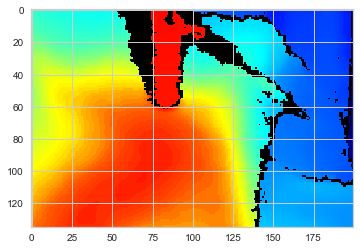

In [1442]:
# Read Images 
img = mpimg.imread('/Users/sunnysingh/Desktop/HarVi/curr_work/Images/April17/Silicone_200poke_top_far/frame000000.png') 
  
# Output Images 
plt.imshow(img) 

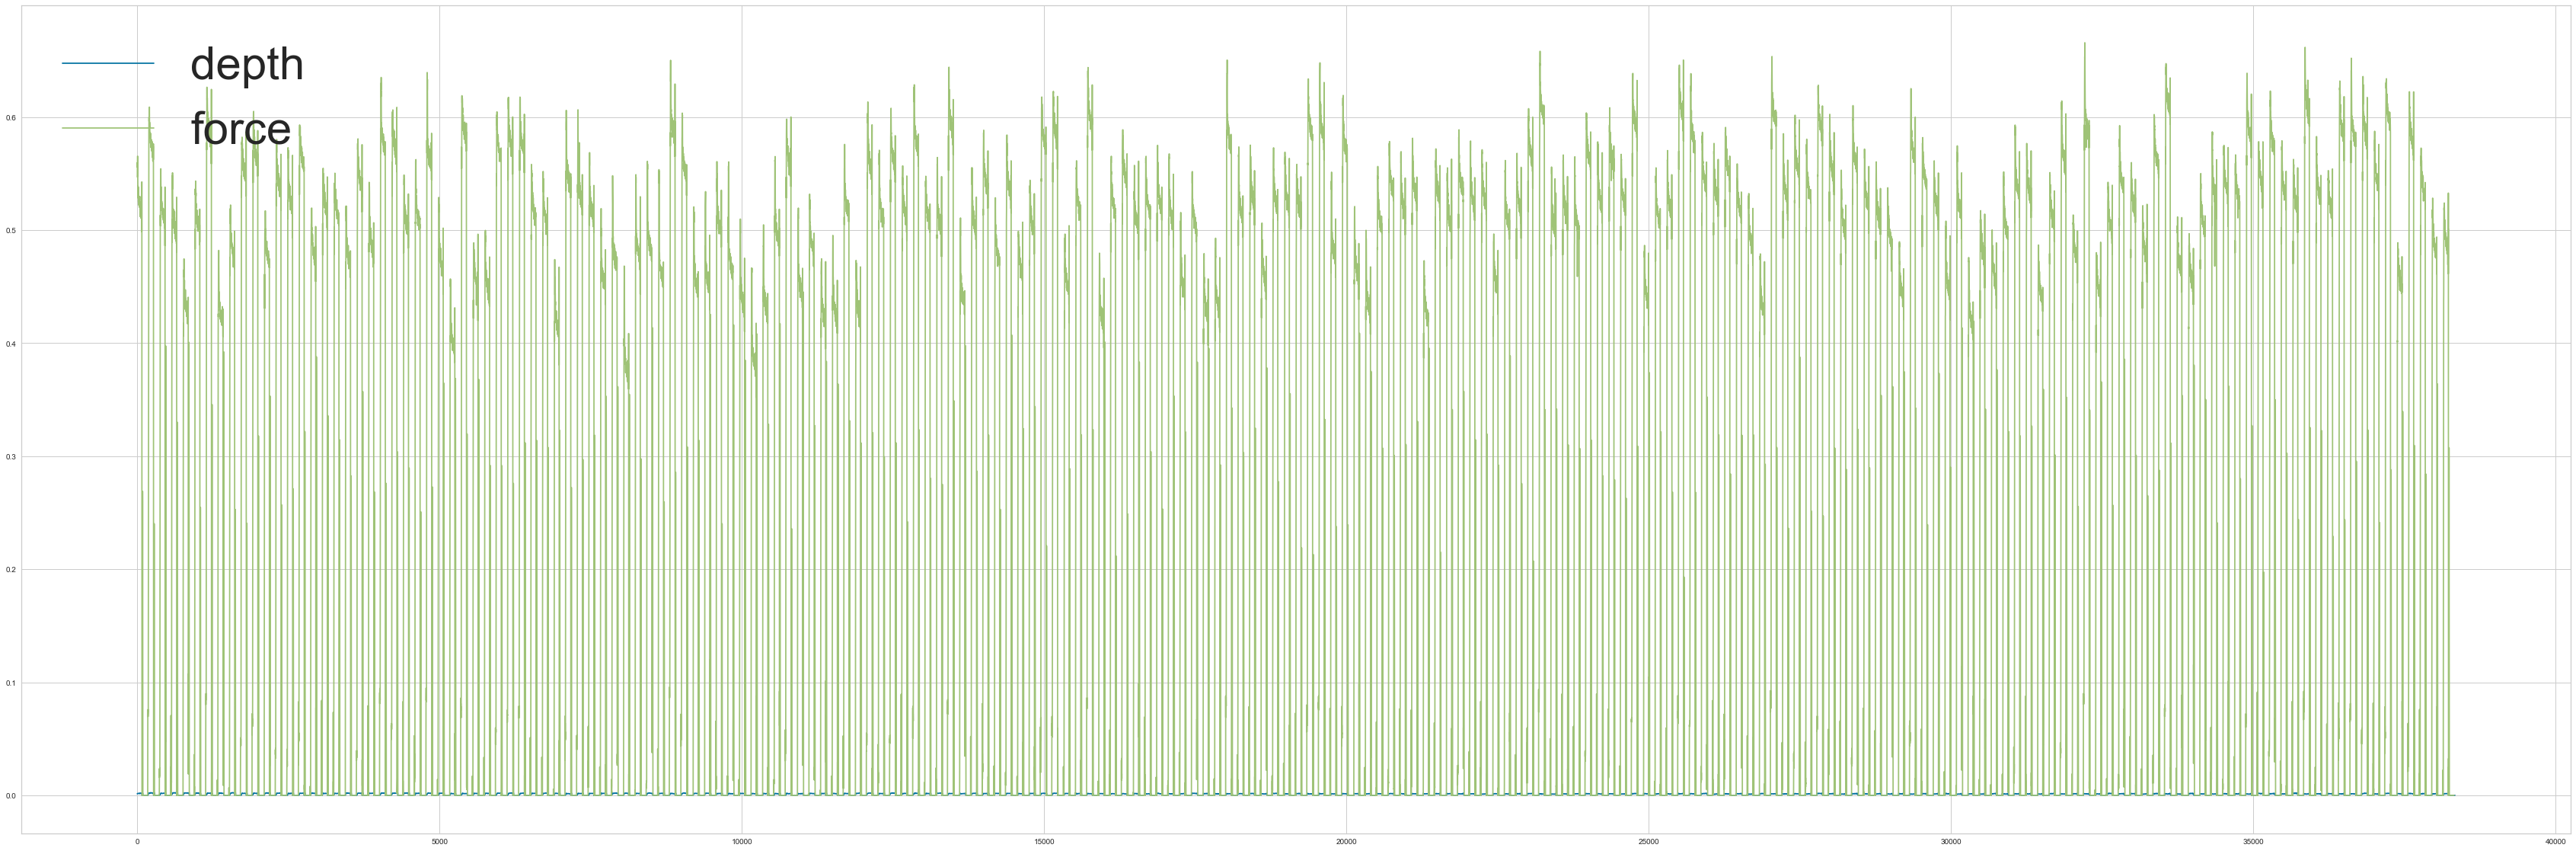

In [1529]:
plt.figure(figsize=(60,20))
plt.plot(depth1.Depth)
plt.plot(force1)
plt.legend(['depth','force'],loc=2,prop={'size': 60})
plt.show()

### Experiment 3: Twice Distance, PoV - rotated 90 deg top

In [1618]:
depth3 = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April18/final_sample_depth_pov_removed_lower_unscaled_exp3.csv")
force3 = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April18/final_sample_force_pov_removed_lower_unscaled_exp3.csv")
depth3['Defor'] = depth3.Depth.diff()
depth3['Defor'][0]=-depth3.Depth[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


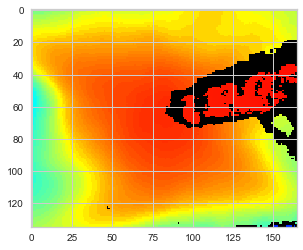

In [1445]:
# Read Images 
img = mpimg.imread('/Users/sunnysingh/Desktop/HarVi/curr_work/Images/April18/Silicone_200poke_top_pov/frame000000.png') 
  
# Output Images 
plt.imshow(img) 

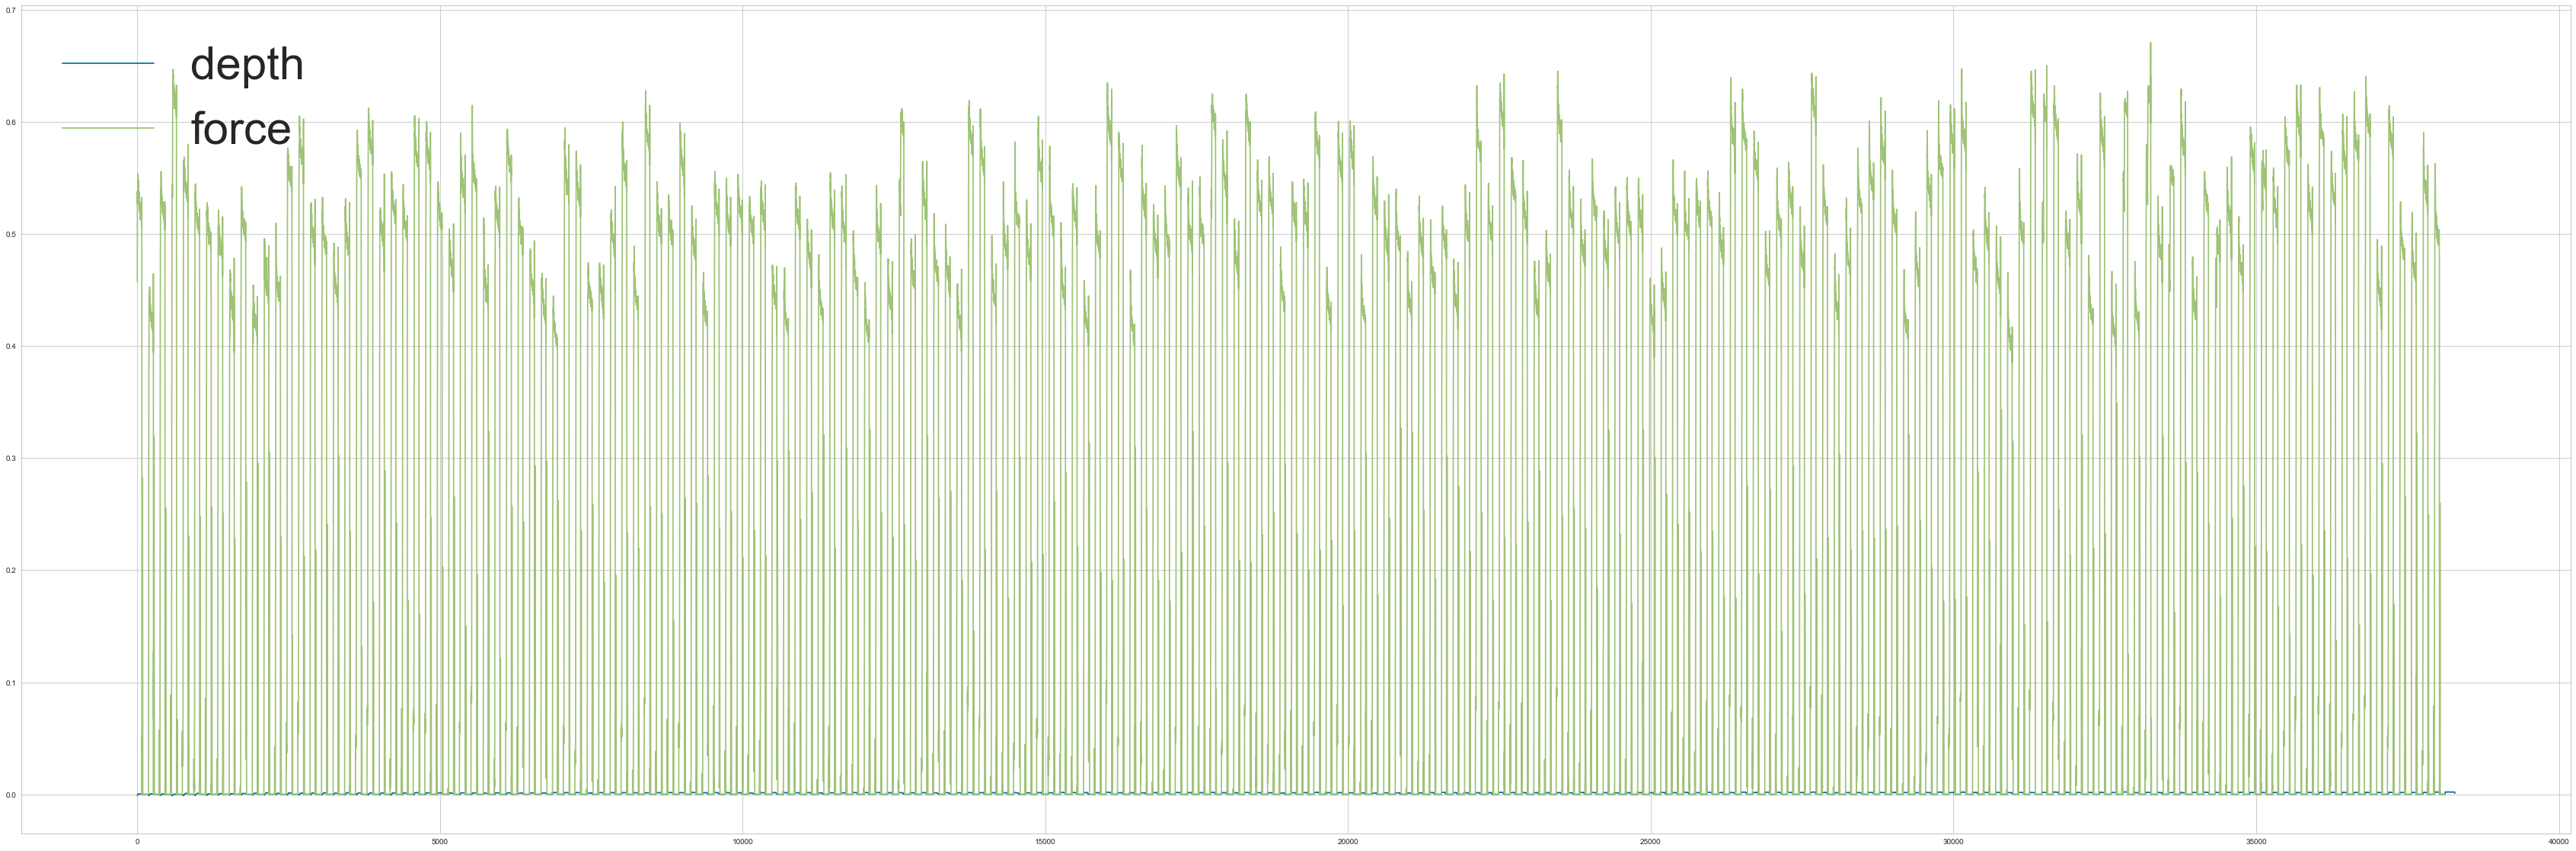

In [1531]:
plt.figure(figsize=(60,20))
plt.plot(depth3.Depth)
plt.plot(force3)
plt.legend(['depth','force'],loc = 2,prop={'size': 60})
plt.show()

### Experiment 4: Twice Distnace, PoV - Left inclined

In [1642]:
depth4 = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April18/final_sample_depth_left_removed_lower_unscaled_exp4.csv")
force4 = pd.read_csv("/Users/sunnysingh/Desktop/HarVi/curr_work/CSV/April18/final_sample_force_left_removed_lower_unscaled_exp4.csv")
depth4['Defor'] = depth4.Depth.diff()
depth4['Defor'][0]=-depth4.Depth[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


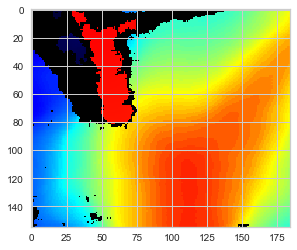

In [1448]:
# Read Images 
img = mpimg.imread('/Users/sunnysingh/Desktop/HarVi/curr_work/Images/April18/Silicone_200poke_left_top/frame000000.png') 
  
# Output Images 
plt.imshow(img) 

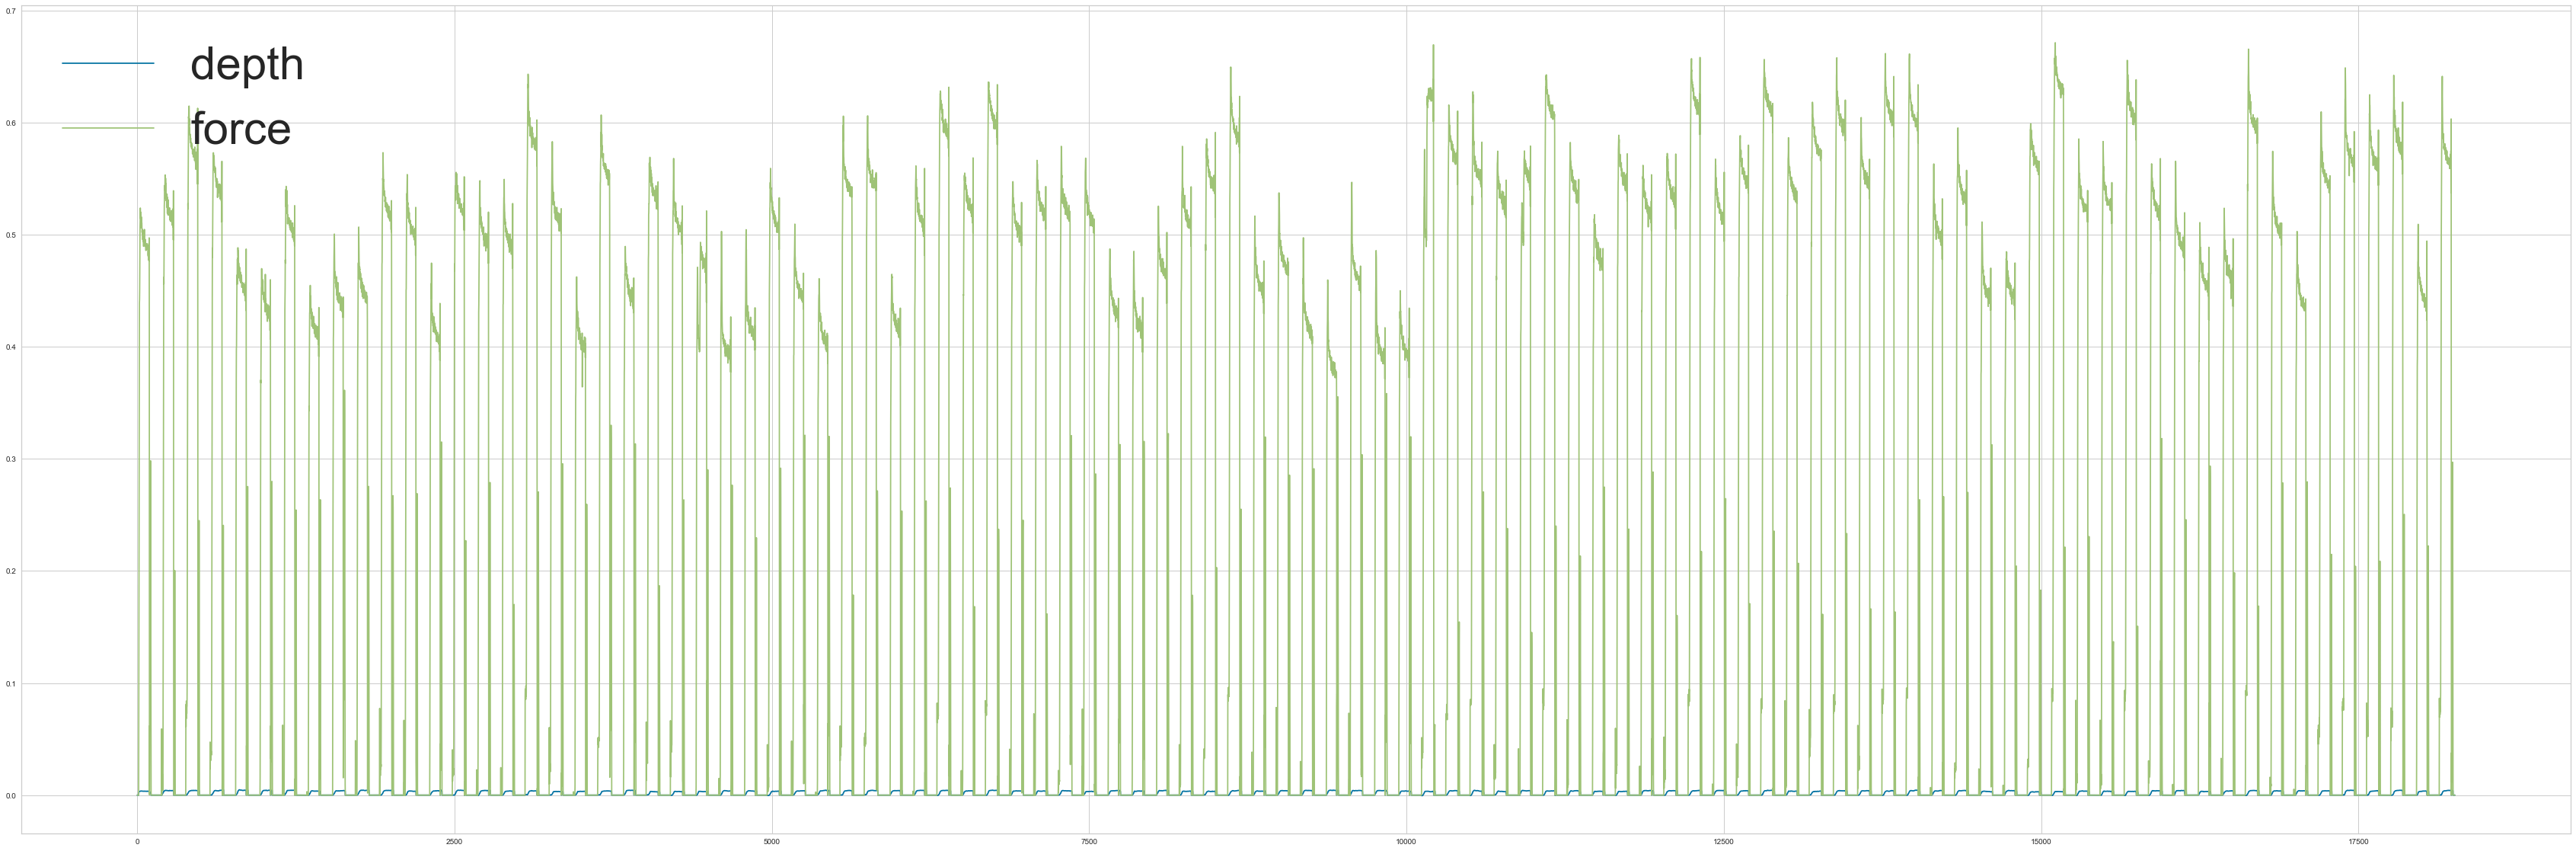

In [1533]:
plt.figure(figsize=(60,20))
plt.plot(depth4.Depth)
plt.plot(force4)
plt.legend(['depth','force'],loc = 2,prop={'size': 60})
plt.show()

# Preprocess

In [1620]:
print(len(force))
print(len(depth))
print(np.max(depth))

25751
25762
Depth    0.0053302
Exp              a
Defor    0.0052342
dtype: object


In [1621]:
print(len(force1))
print(len(depth1))
print(np.max(depth1))

38321
38332
Depth    0.0023614
Exp              b
Defor    0.0023148
dtype: object


In [1622]:
print(len(force3))
print(len(depth3))
print(np.max(depth3))

38121
38282
Depth    0.0022152
Exp              c
Defor     0.002084
dtype: object


In [1623]:
print(len(force4))
print(len(depth4))
print(np.max(depth4))

18260
18260
Depth     0.00475
Exp             d
Defor    0.004509
dtype: object


In [1624]:
depth = depth[:-11]
depth1 = depth1[:-11]
# force2 = force2[:-115]
#force3 = force3[:-10]
#force4 = force4[10:]
depth3 = depth3[:-161]
assert len(depth)==len(force)
assert len(depth1)==len(force1)
assert len(depth3)==len(force3)
assert len(depth4)==len(force4)


In [1643]:
combdepth = pd.DataFrame()
combdepth = combdepth.append([depth[:18260],depth1[:18260],depth3[:18260],depth4[:18260]])

combforce = pd.DataFrame()
combforce = combforce.append([force[:18260],force1[:18260],force3[:18260],force4[:18260]])


# frames = [depth, force]
# df = pd.concat(frames,axis=1)
# df

In [1644]:
combdepth

Depth Exp     Defor
0     -0.000663   a  0.000663
1     -0.000409   a  0.000254
2     -0.000010   a  0.000399
3      0.000305   a  0.000315
4      0.000501   a  0.000196
...         ...  ..       ...
18255  0.000000   d  0.000000
18256  0.000000   d  0.000000
18257  0.000000   d  0.000000
18258  0.000000   d  0.000000
18259  0.000000   d  0.000000

[73040 rows x 3 columns]

In [1645]:
combforce

Force
0      0.53407
1      0.56263
2      0.56727
3      0.57016
4      0.56635
...        ...
18255  0.00000
18256  0.00000
18257  0.00000
18258  0.00000
18259  0.00000

[73040 rows x 1 columns]

In [1646]:
frames = [combdepth, combforce]
df = pd.concat(frames,axis=1)
df

Depth Exp     Defor    Force
0     -0.000663   a  0.000663  0.53407
1     -0.000409   a  0.000254  0.56263
2     -0.000010   a  0.000399  0.56727
3      0.000305   a  0.000315  0.57016
4      0.000501   a  0.000196  0.56635
...         ...  ..       ...      ...
18255  0.000000   d  0.000000  0.00000
18256  0.000000   d  0.000000  0.00000
18257  0.000000   d  0.000000  0.00000
18258  0.000000   d  0.000000  0.00000
18259  0.000000   d  0.000000  0.00000

[73040 rows x 4 columns]

In [1785]:
df['Exp1'] = 0
df['Exp2'] = 0
df['Exp3'] = 0
df['Exp4'] = 0

In [ ]:
mask = test['Exp']=='d'

test['Exp4'][mask]=1

In [1647]:
test = df.drop_duplicates()

In [1648]:
test['Exp1'] = 0
test['Exp2'] = 0
test['Exp3'] = 0
test['Exp4'] = 0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [1652]:
mask = test['Exp']=='d'
test['Exp4'][mask]=1
test

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Depth Exp     Defor     Force  Exp1  Exp2  Exp3  Exp4
0     -0.000663   a  0.000663  0.534070     1     0     0     0
1     -0.000409   a  0.000254  0.562630     1     0     0     0
2     -0.000010   a  0.000399  0.567270     1     0     0     0
3      0.000305   a  0.000315  0.570160     1     0     0     0
4      0.000501   a  0.000196  0.566350     1     0     0     0
...         ...  ..       ...       ...   ...   ...   ...   ...
18241  0.004158   d  0.000015  0.296920     0     0     0     1
18242  0.004163   d  0.000005  0.255900     0     0     0     1
18243  0.004104   d -0.000059  0.174440     0     0     0     1
18244  0.003983   d -0.000121  0.062821     0     0     0     1
18245  0.000000   d -0.003983  0.000000     0     0     0     1

[39827 rows x 8 columns]

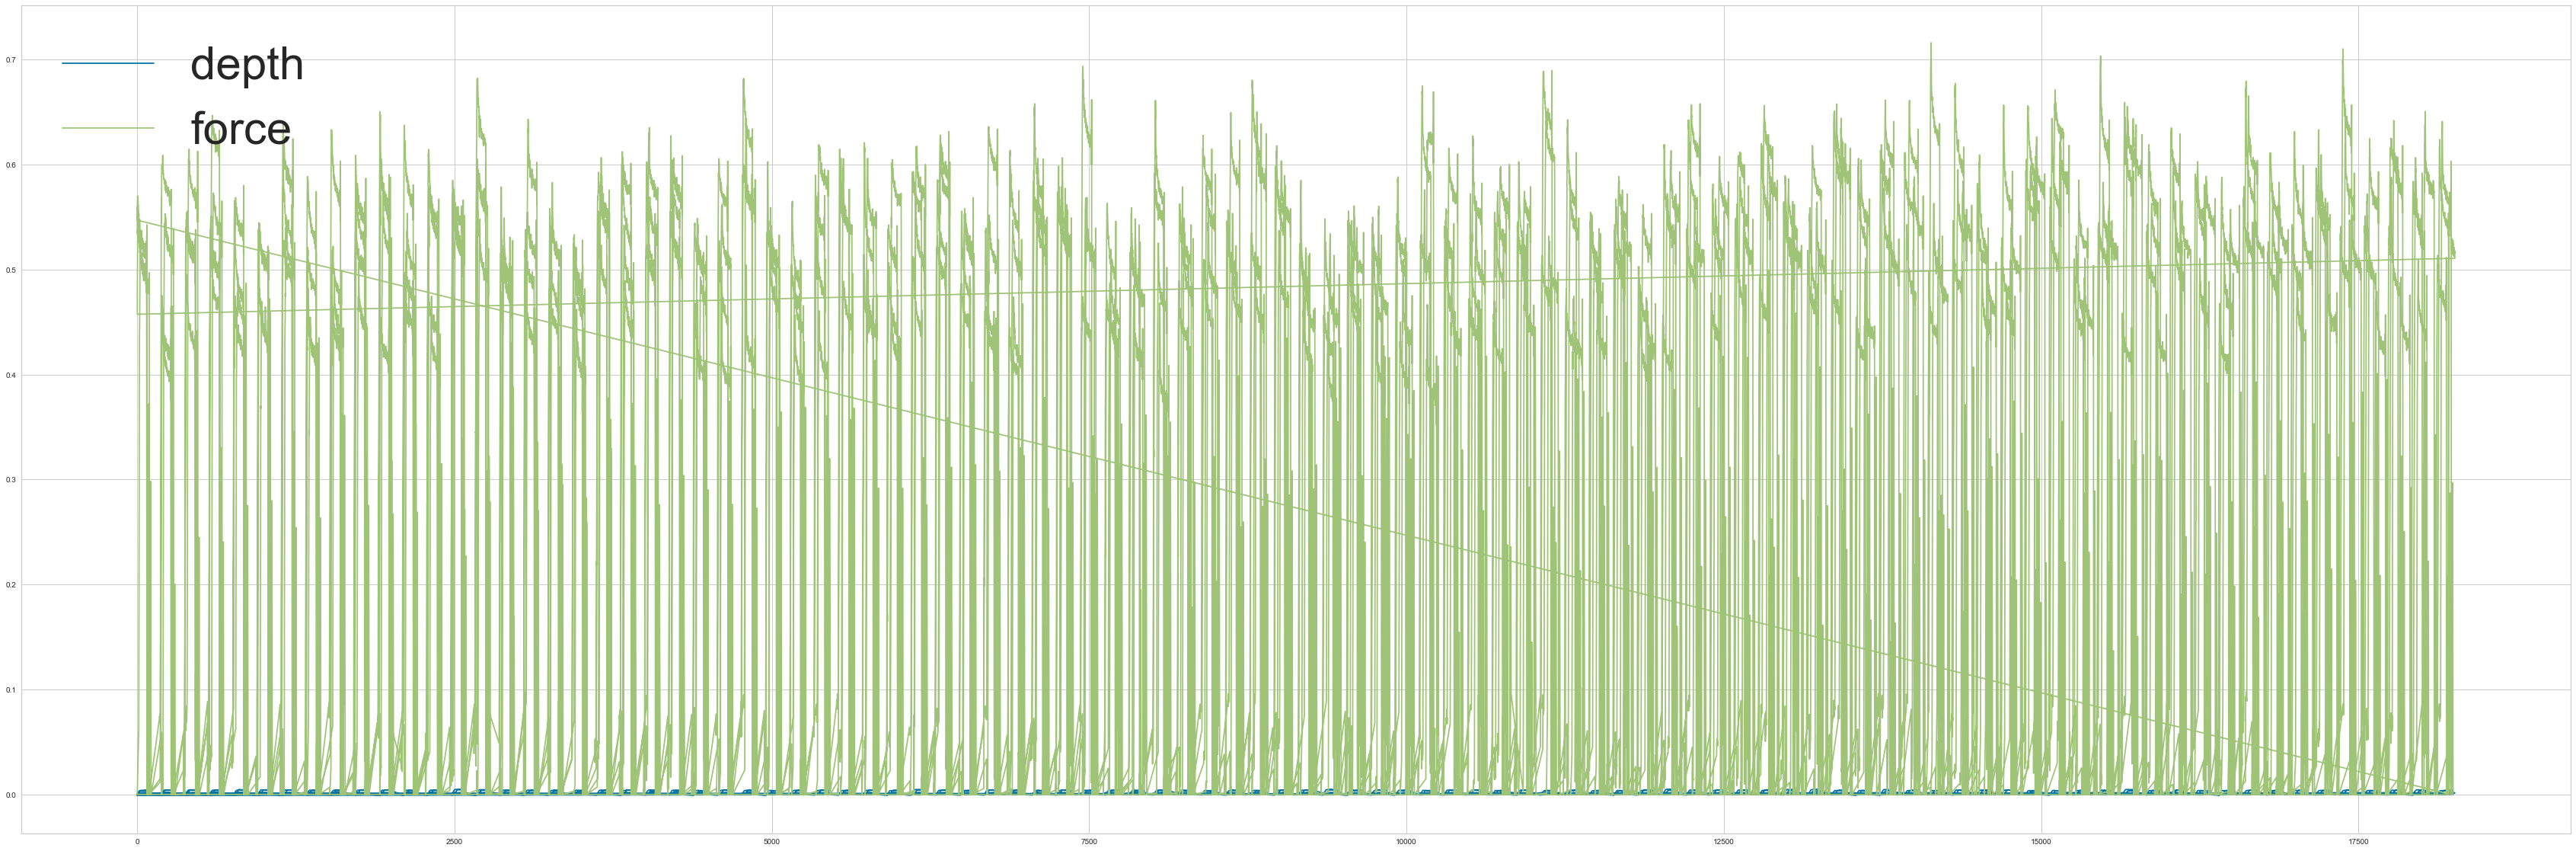

In [1653]:
plt.figure(figsize=(60,20))
plt.plot(test.Depth)
plt.plot(test.Force)
plt.legend(['depth','force'],loc = 2,prop={'size': 60})
plt.show()

In [1654]:
test

Depth Exp     Defor     Force  Exp1  Exp2  Exp3  Exp4
0     -0.000663   a  0.000663  0.534070     1     0     0     0
1     -0.000409   a  0.000254  0.562630     1     0     0     0
2     -0.000010   a  0.000399  0.567270     1     0     0     0
3      0.000305   a  0.000315  0.570160     1     0     0     0
4      0.000501   a  0.000196  0.566350     1     0     0     0
...         ...  ..       ...       ...   ...   ...   ...   ...
18241  0.004158   d  0.000015  0.296920     0     0     0     1
18242  0.004163   d  0.000005  0.255900     0     0     0     1
18243  0.004104   d -0.000059  0.174440     0     0     0     1
18244  0.003983   d -0.000121  0.062821     0     0     0     1
18245  0.000000   d -0.003983  0.000000     0     0     0     1

[39827 rows x 8 columns]

# Train Test Split

In [1883]:
X = df[['Depth','Defor']]
y = df[['Force']]

In [1884]:
X

Depth     Defor
0     -0.000663  0.000663
1     -0.000409  0.000254
2     -0.000010  0.000399
3      0.000305  0.000315
4      0.000501  0.000196
...         ...       ...
18255  0.000000  0.000000
18256  0.000000  0.000000
18257  0.000000  0.000000
18258  0.000000  0.000000
18259  0.000000  0.000000

[73040 rows x 2 columns]

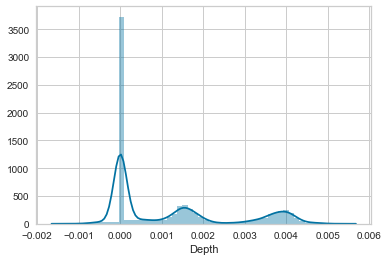

In [1885]:
sns.distplot(X.Depth)

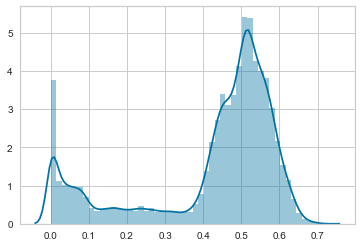

In [1882]:
sns.distplot(y)

In [1861]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1862]:
X_train = X_train.reset_index().drop(columns=['index'])
X_test = X_test.reset_index().drop(columns=['index'])
y_train = y_train.reset_index().drop(columns=['index'])
y_test = y_test.reset_index().drop(columns=['index'])

In [1863]:
y_test.Force

0       0.50597
1       0.40975
2       0.00000
3       0.47673
4       0.42910
         ...   
7961    0.54500
7962    0.56928
7963    0.43153
7964    0.50281
7965    0.07615
Name: Force, Length: 7966, dtype: float64

In [1841]:
# X_train = X
# y_train = y
# X_test = depth1.Depth.values.reshape(-1,1)[5000:10000]
# y_test = force1.Force.values.reshape(-1,1)[5000:10000]

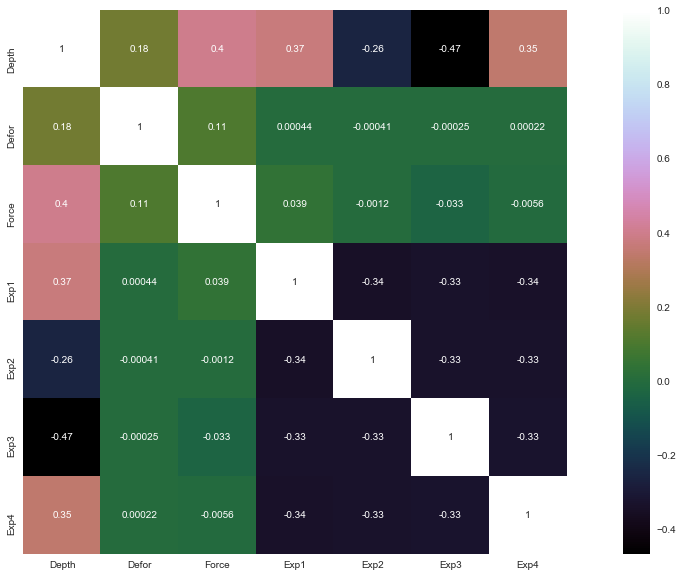

In [1874]:
corr_mat=pd.DataFrame(test).corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# Evaluating Models

# Linear Regression

In [1864]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)
y_lr_pred_true = lr.predict(X)

# Polynomial Model

In [1865]:
degree = 6
poly_features = PolynomialFeatures(degree=degree)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_poly_pred = poly_model.predict(poly_features.fit_transform(X_test))
y_poly_pred_true = poly_model.predict(poly_features.fit_transform(X))

# Ridge Regression

In [1866]:
n_alphas = 100
alpha = np.logspace(-10, -2, n_alphas)
scaler = StandardScaler()

ridge = Ridge(alpha=1e-9,normalize=True,solver='auto')
ridge.fit(scaler.fit_transform(X_train),y_train)
y_ridge_pred = ridge.predict(scaler.fit_transform(X_test))
y_ridge_pred_true = ridge.predict(scaler.fit_transform(X))

# Lasso Regression

In [1867]:
n_alphas = 100
alpha = np.logspace(-10, -2, n_alphas)
scaler = StandardScaler()
lasso = Lasso(alpha=0)
lasso.fit(scaler.fit_transform(X_train),y_train)
y_lasso_pred = lasso.predict(scaler.fit_transform(X_test))
y_lasso_pred_true = lasso.predict(scaler.fit_transform(X))


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455.8794425258561, tolerance: 0.10855485670299529
  positive)


# Decision Tree Regression

In [1868]:
dt = DecisionTreeRegressor(max_depth=15)
dt.fit(X_train,y_train)
y_dt_pred = dt.predict(X_test)
y_dt_pred_true = dt.predict(X)


# Score Metrics

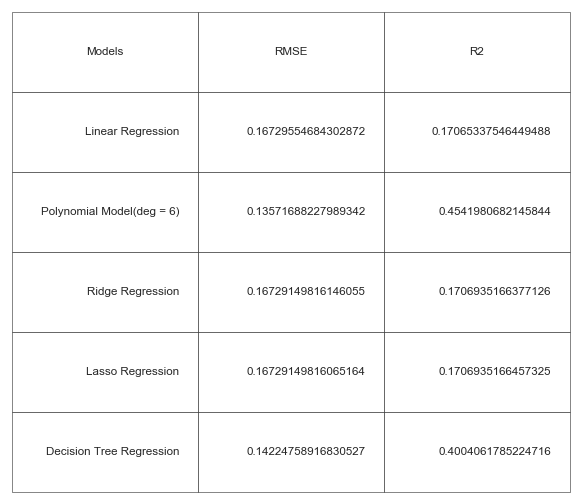

In [1869]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(1,1,1)
colLabels=("Models", "RMSE","R2")
table_data=[
    ["Linear Regression",np.sqrt(mean_squared_error(y_test, y_lr_pred)),r2_score(y_test, y_lr_pred)],
    ["Polynomial Model(deg = 6)",np.sqrt(mean_squared_error(y_test, y_poly_pred)),r2_score(y_test, y_poly_pred)],
    ["Ridge Regression",np.sqrt(mean_squared_error(y_test, y_ridge_pred)),r2_score(y_test, y_ridge_pred)],
    ["Lasso Regression",np.sqrt(mean_squared_error(y_test, y_lasso_pred)),r2_score(y_test, y_lasso_pred)],
    ["Decision Tree Regression", np.sqrt(mean_squared_error(y_test, y_dt_pred)),r2_score(y_test, y_dt_pred)],
]
result = {}
table = ax.table(cellText=table_data, loc='center',colLabels=colLabels)
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.show()

# Fit Curve

Text(0.5, 1.0, 'Decision Tree Regression')

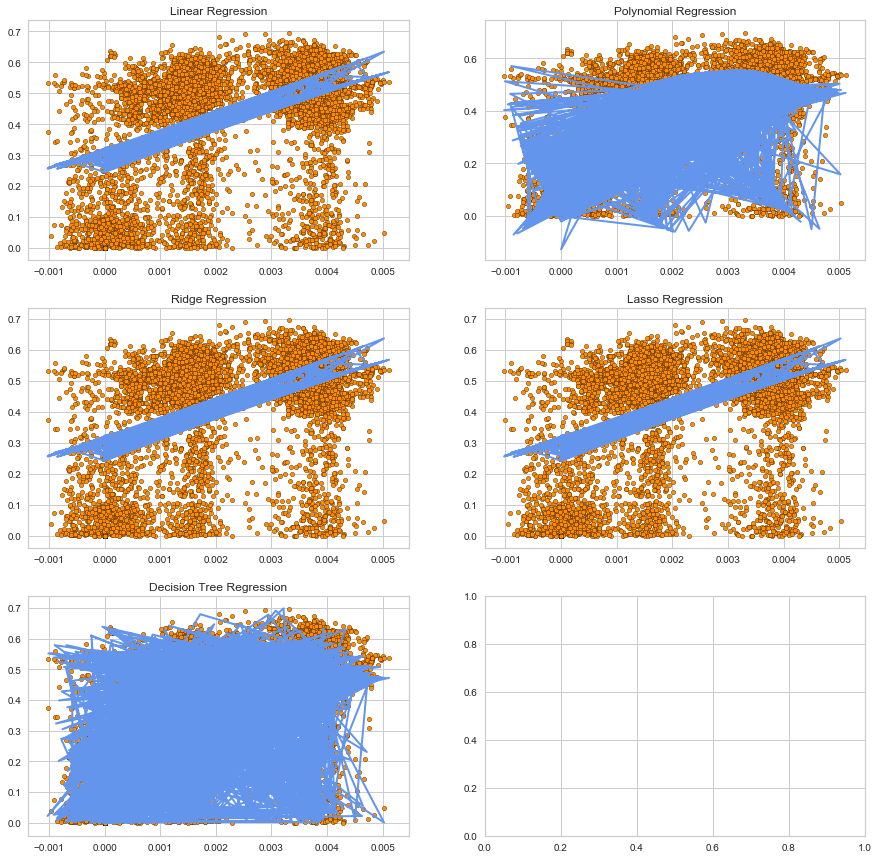

In [1827]:
fig,axs = plt.subplots(3, 2,figsize=(15,15))

axs[0, 0].plot(X_test.Depth, y_lr_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
axs[0, 0].scatter(X_test.Depth, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
axs[0, 0].set_title('Linear Regression')


axs[0, 1].plot(X_test.Depth, y_poly_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
axs[0, 1].scatter(X_test.Depth, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
axs[0, 1].set_title('Polynomial Regression')


axs[1, 0].plot(X_test.Depth, y_ridge_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
axs[1, 0].scatter(X_test.Depth, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
axs[1, 0].set_title('Ridge Regression')


axs[1, 1].plot(X_test.Depth, y_lasso_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
axs[1, 1].scatter(X_test.Depth, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
axs[1, 1].set_title('Lasso Regression')


axs[2, 0].plot(X_test.Depth, y_dt_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
axs[2, 0].scatter(X_test.Depth, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
axs[2, 0].set_title('Decision Tree Regression')


In [1764]:
y_test.Force.values.reshape(len(y_lr_pred),1)

array([[0.50597],
       [0.40975],
       [0.     ],
       ...,
       [0.43153],
       [0.50281],
       [0.07615]])

In [1737]:
y_lr_pred = y_lr_pred.reshape(len(y_lr_pred),1)
y_lr_pred.shape

(7966, 1)

# Residual Plot

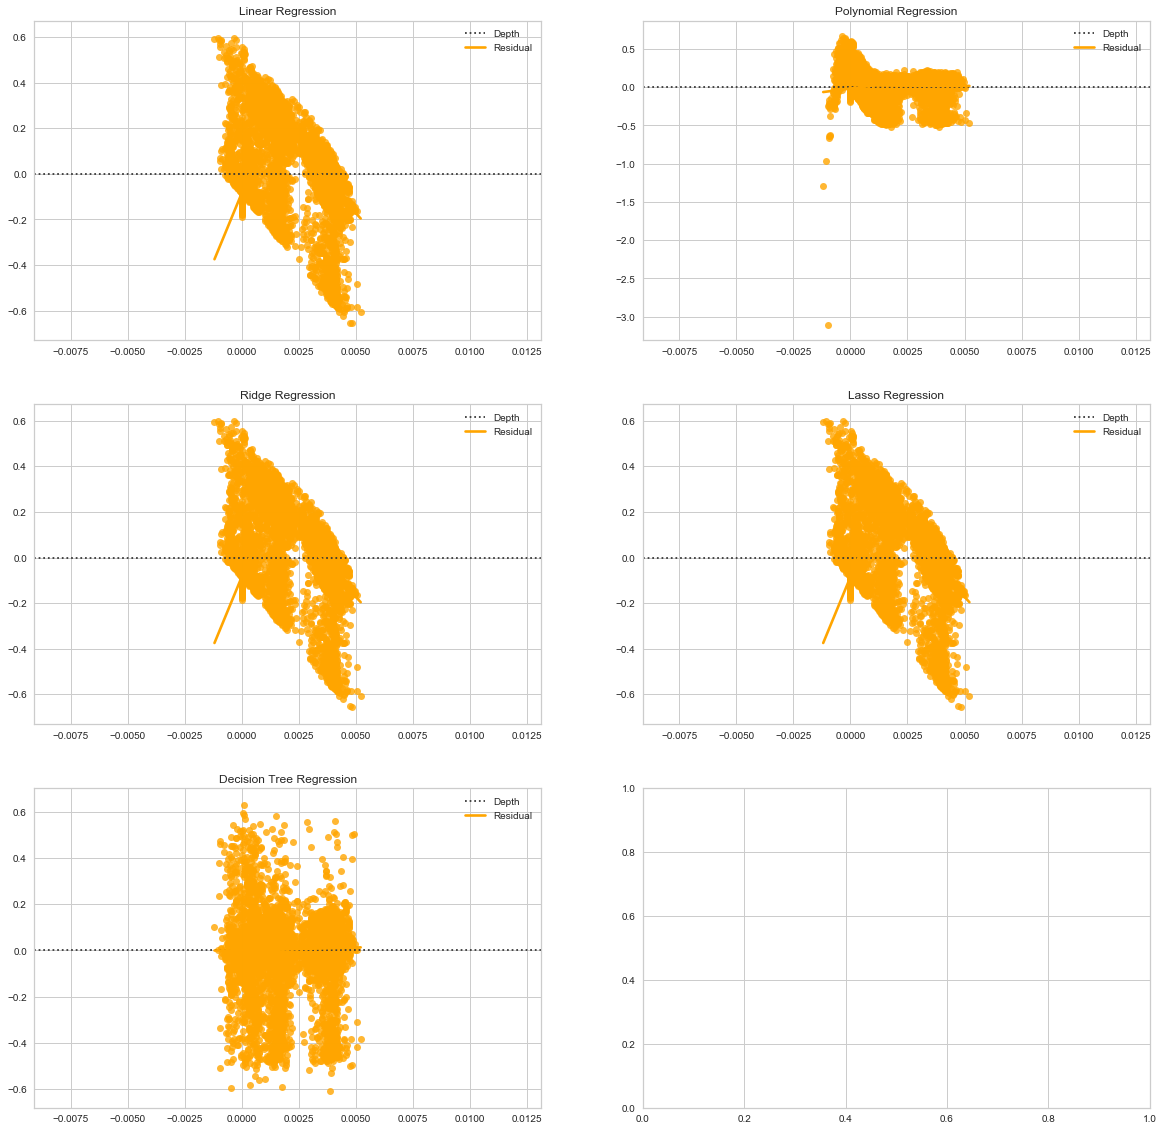

In [1782]:
y_lr_pred = y_lr_pred.reshape(len(y_lr_pred),1)
y_poly_pred = y_poly_pred.reshape(len(y_poly_pred),1)
y_ridge_pred = y_ridge_pred.reshape(len(y_ridge_pred),1)
y_lasso_pred = y_lasso_pred.reshape(len(y_lasso_pred),1)
y_dt_pred = y_dt_pred.reshape(len(y_dt_pred),1)
fig, axs = plt.subplots(3, 2,figsize=(20, 20))

sns.residplot(X_test.Depth.values.reshape(len(y_lr_pred),1), y_test.Force.values.reshape(len(y_lr_pred),1)-y_lr_pred, lowess=True, color="orange",ax=axs[0,0])
axs[0,0].title.set_text('Linear Regression')
axs[0,0].legend(['Depth','Residual'])
sns.residplot(X_test.Depth.values.reshape(len(X_test.Depth),1), y_test.Force.values.reshape(len(y_lr_pred),1)-y_poly_pred, lowess=True, color="orange",ax=axs[0,1])
axs[0,1].title.set_text('Polynomial Regression')
axs[0,1].legend(['Depth','Residual'])

sns.residplot(X_test.Depth.values.reshape(len(X_test.Depth),1), y_test.Force.values.reshape(len(y_lr_pred),1)-y_ridge_pred, lowess=True, color="orange",ax=axs[1,0])
axs[1,0].title.set_text('Ridge Regression')
axs[1,0].legend(['Depth','Residual'])

sns.residplot(X_test.Depth.values.reshape(len(X_test.Depth),1), y_test.Force.values.reshape(len(y_lr_pred),1)-y_lasso_pred, lowess=True, color="orange",ax=axs[1,1])
axs[1,1].title.set_text('Lasso Regression')
axs[1,1].legend(['Depth','Residual'])

sns.residplot(X_test.Depth.values.reshape(len(X_test.Depth),1), y_test.Force.values.reshape(len(y_lr_pred),1)-y_dt_pred, lowess=True, color="orange",ax=axs[2,0])
axs[2,0].title.set_text('Decision Tree Regression')
axs[2,0].legend(['Depth','Residual'])




In [1832]:
len(y_lr_pred)

7966

In [1833]:
len(y_test)

7966

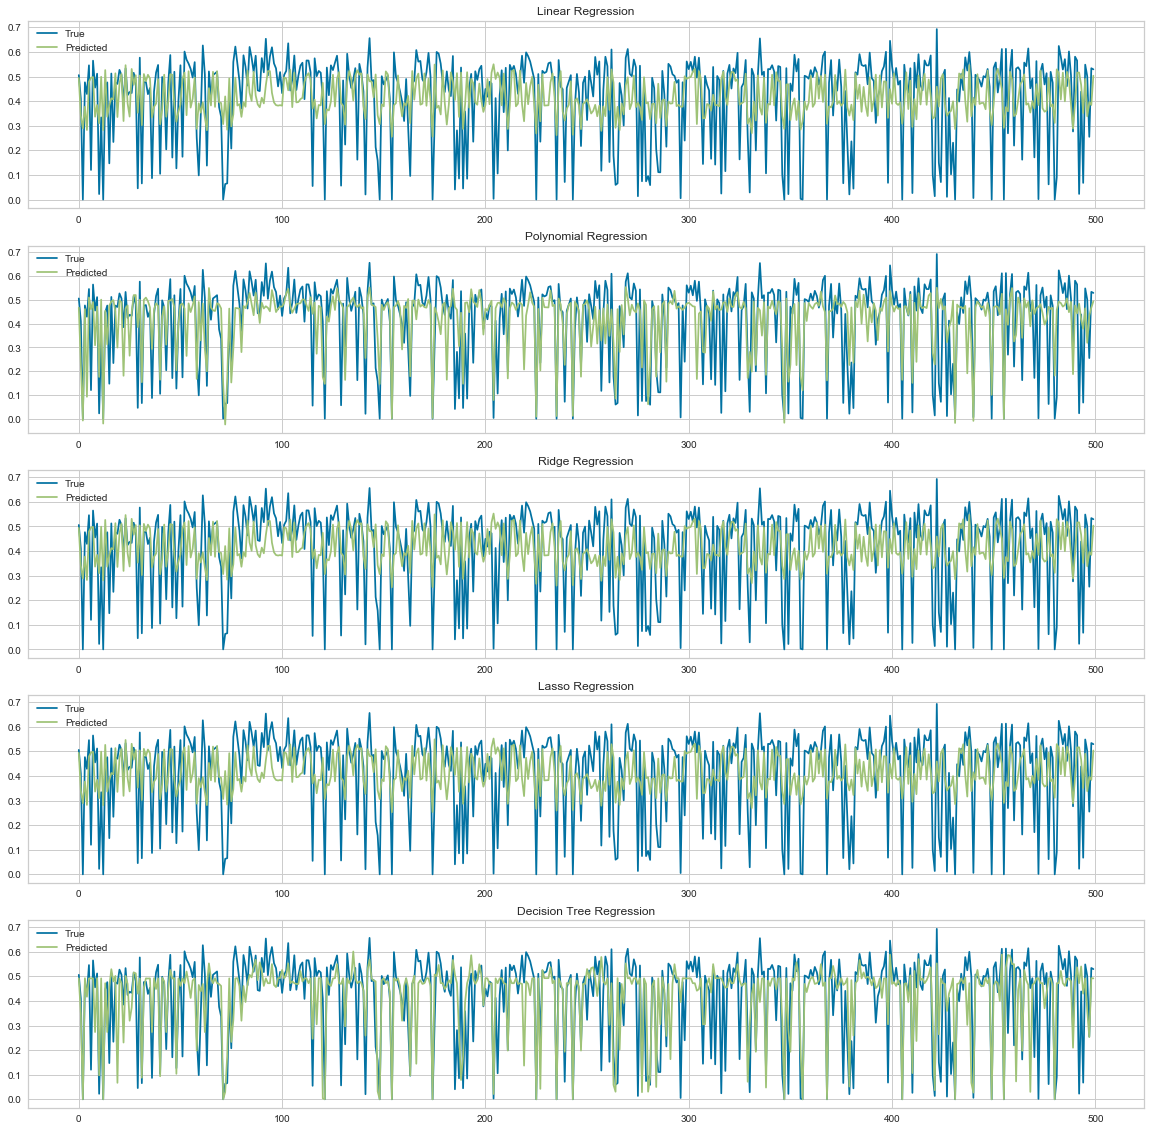

In [1872]:
fig, axs = plt.subplots(5, 1,figsize=(20, 20))
axs[0].plot(y_test[:500])
axs[0].plot(y_lr_pred[:500])
axs[0].title.set_text('Linear Regression')
axs[0].legend(['True','Predicted'])
axs[1].plot(y_test[:500])
axs[1].plot(y_poly_pred[:500])
axs[1].title.set_text('Polynomial Regression')
axs[1].legend(['True','Predicted'])
axs[2].plot(y_test[:500])
axs[2].plot(y_ridge_pred[:500])
axs[2].title.set_text('Ridge Regression')
axs[2].legend(['True','Predicted'])
axs[3].plot(y_test[:500])
axs[3].plot(y_lasso_pred[:500])
axs[3].title.set_text('Lasso Regression')
axs[3].legend(['True','Predicted'])
axs[4].plot(y_test[:500])
axs[4].plot(y_dt_pred[:500])
axs[4].title.set_text('Decision Tree Regression')
axs[4].legend(['True','Predicted'])

plt.show()

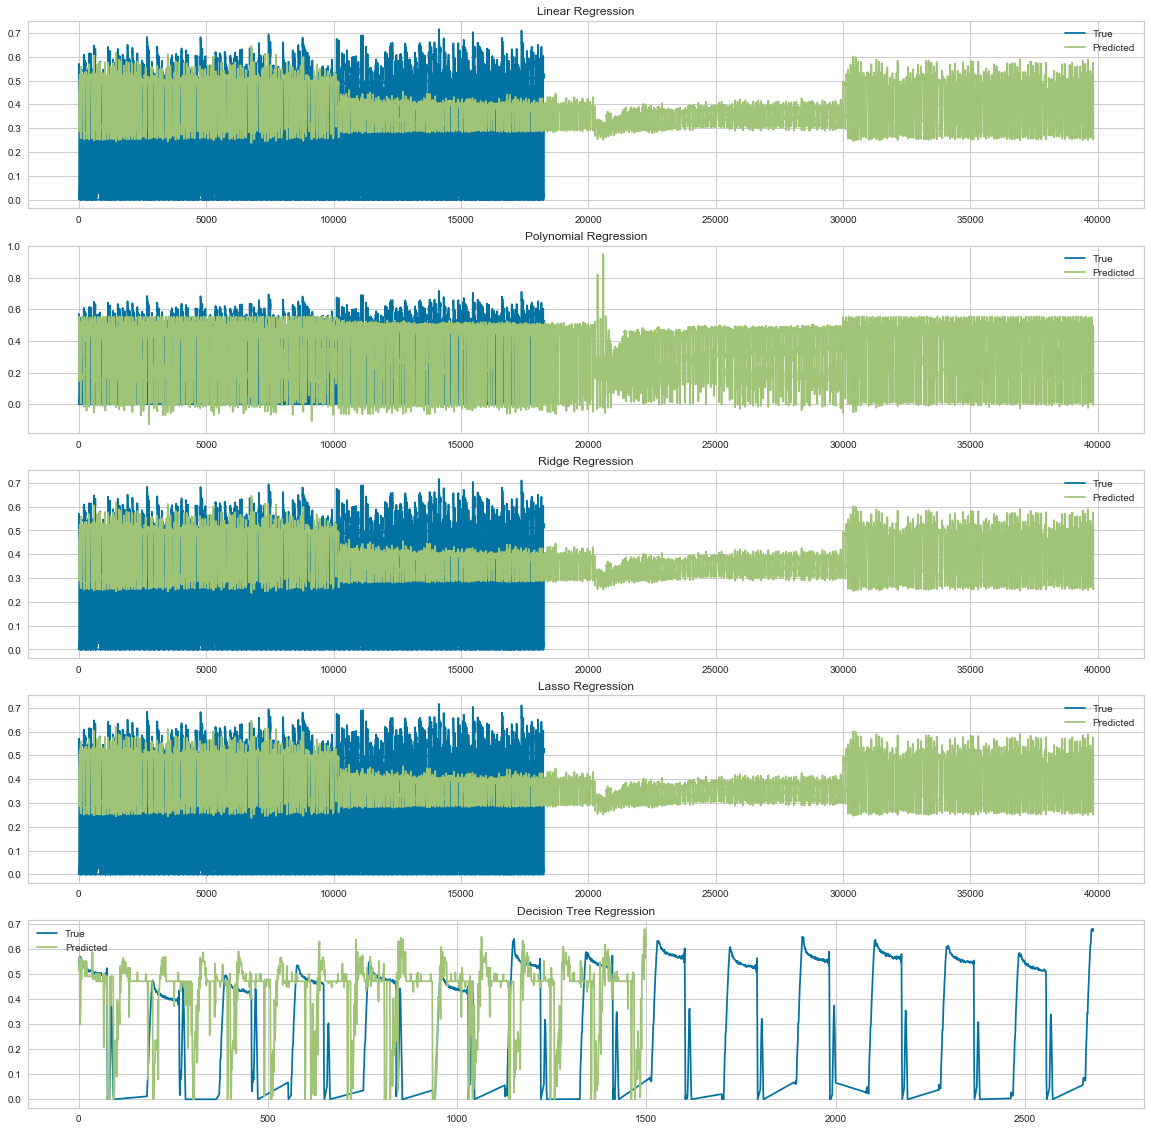

In [1873]:
fig, axs = plt.subplots(5, 1,figsize=(20, 20))
axs[0].plot(y)
axs[0].plot(y_lr_pred_true)
axs[0].title.set_text('Linear Regression')
axs[0].legend(['True','Predicted'])
axs[1].plot(y)
axs[1].plot(y_poly_pred_true)
axs[1].title.set_text('Polynomial Regression')
axs[1].legend(['True','Predicted'])
axs[2].plot(y)
axs[2].plot(y_ridge_pred_true)
axs[2].title.set_text('Ridge Regression')
axs[2].legend(['True','Predicted'])
axs[3].plot(y)
axs[3].plot(y_lasso_pred_true)
axs[3].title.set_text('Lasso Regression')
axs[3].legend(['True','Predicted'])
axs[4].plot(y[:1500])
axs[4].plot(y_dt_pred_true[:1500])
axs[4].title.set_text('Decision Tree Regression')
axs[4].legend(['True','Predicted'])


plt.show()

# Learning Curve

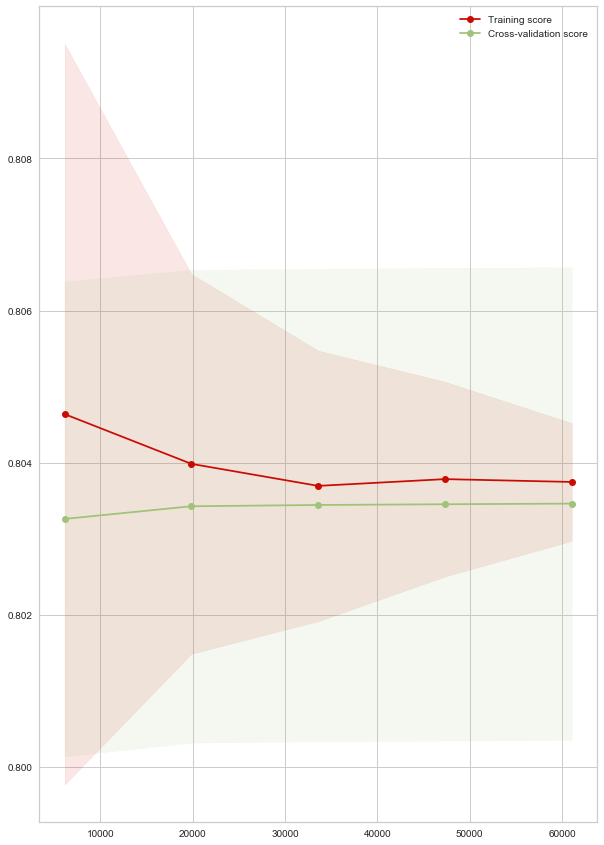

In [155]:
train_sizes, train_scores, test_scores = \
        learning_curve(LinearRegression(), X_train_poly, y_train, cv= ShuffleSplit(n_splits=100, test_size=0.2, random_state=0), n_jobs=None,
                       train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fig, axes = plt.subplots(1, 1, figsize=(10, 15))

axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes.legend(loc="best")
plt.show()


In [156]:
degree = 6
poly_features = PolynomialFeatures(degree=degree)
model = sm.OLS(y_train, poly_features.fit_transform(X_train)).fit() ## sm.OLS(output, input)
predictions = model.predict(poly_features.fit_transform(X_test))

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 5.209e+04
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:37:15   Log-Likelihood:                 63112.
No. Observations:               76341   AIC:                        -1.262e+05
Df Residuals:                   76334   BIC:                        -1.261e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0305      0.001     38.997      0.000       0.029       0.032
x1             0.0110      0.025      0.446      0.655      -0.037       0.059
x2             1.8252      0.435      4.194      0.000       0.972       2.678
x3            71.3841      4.597     15.529      0.000      62.375      80.394
x4          -339.0285     21.442    -15.811      0.000    -381.055    -297.002
x5           520.5874     43.667     11.922      0.000     435.000     606.175
x6          -255.2603     32.176     -7.933      0.000    -318.326    -192.195
==============================================================================
Omnibus:                     4687.808   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16516.806
Skew:                           0.241   Prob(JB):                         0.00
Kurtosis:                       5.227   Cond. No.                     1.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""